In [5]:
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

IMAGE_SOURCE_PATH: str = 'CelebA/img_align_celeba'
img_src_path = Path(IMAGE_SOURCE_PATH)

In [6]:
IDENTITY_LABEL_PATH: str = 'CelebA/Anno/identity_CelebA.txt'
identity_df = pd.read_csv(IDENTITY_LABEL_PATH, sep=' ', header=None)

identity_df.head()

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


(array([ 834.,  611.,  764.,  551.,  564., 2114., 1078.,  808., 2845.,
           8.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

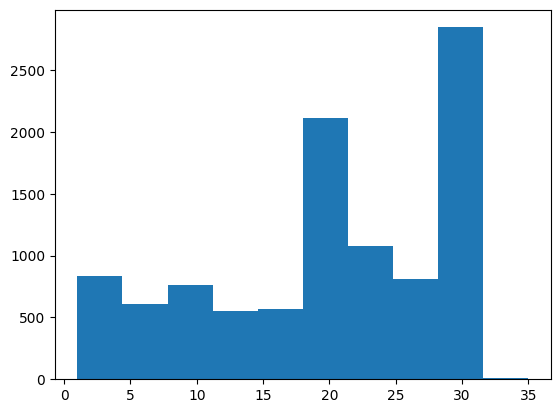

In [7]:
group_nums = identity_df.groupby(1)[0].nunique()

plt.hist(group_nums)

# Cook the Dataset

In [11]:
from tqdm.notebook import tqdm

DST_DIR: str = '../datasets/celeba-recog-16/'
N_IDENTITIES: int = 16
VLA_RATIO: float = 0.1
RANDOM_SAMPLING: bool = True

dst_dir = Path(DST_DIR)
train_mapping_list = []
val_mapping_list = []
total = 0
max_index = identity_df[1].max()

def lottery(p=0.8) -> bool:
    return np.random.rand() < p

output_id = list(range(N_IDENTITIES))
if RANDOM_SAMPLING:
    sample_id = np.random.choice(range(max_index), size=N_IDENTITIES, replace=False)
else:
    sample_id = output_id

for sample_i, label_i in zip(tqdm(sample_id), output_id):
    data = identity_df[0][identity_df[1] == sample_i]
    for img_fn in data:
        to_train = lottery(1.0 - VLA_RATIO)
        train_val = 'train' if to_train else 'val'

        to_dst_dir = (dst_dir / train_val) / 'images'
        if not to_dst_dir.exists():
            to_dst_dir.mkdir(parents=True)

        dst_path = to_dst_dir / img_fn
        img_scr_path = img_src_path / img_fn
        shutil.copy(img_scr_path, dst_path)

        label = (img_fn, label_i)
        if to_train:
            train_mapping_list.append(label)
        else:
            val_mapping_list.append(label)

        total += 1

pd.DataFrame(train_mapping_list).to_csv((dst_dir / 'train') / 'mapping.csv', header=False, index=False)
if len(val_mapping_list):
    pd.DataFrame(val_mapping_list).to_csv((dst_dir / 'val') / 'mapping.csv', header=False, index=False)

print(f'Total number: {total}')

  0%|          | 0/16 [00:00<?, ?it/s]

Total number: 285
